## Gated Recurrent Units (GRUs)

A **Gated Recurrent Unit (GRU)** is a type of Recurrent Neural Network (RNN) designed to capture long-term dependencies while reducing complexity compared to LSTMs.  
It merges the **cell state** and **hidden state** into a single **hidden state** and uses only **two gates**:
- **Update Gate**
- **Reset Gate**

### Inputs
- **x(t):** Current input at time *t*  
- **h(t-1):** Previous hidden state

### 1.Update Gate \( z_t \)
- Controls how much of the previous hidden state should be carried forward to the next step.
- **Equation:**

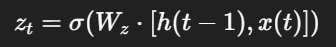

- **Interpretation:**  
  - Close to **1** → Keep most of the old memory  
  - Close to **0** → Focus more on the new candidate

### 2. Reset Gate \( r_t \)
- **Purpose:** Decides how much of the past information to forget when computing the candidate hidden state.
- **Equation:**

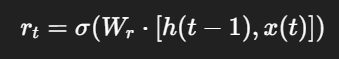

### 3. Candidate Hidden State \( h_t)
- Combines the reset gate with the previous hidden state to generate a new candidate:

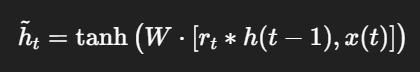

### 4. New Hidden State \( h_t \)
- The update gate blends the old hidden state with the candidate:

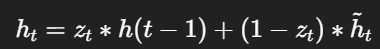

### Key Differences: GRU vs LSTM

| Feature          | LSTM                              | GRU                           |
|------------------|------------------------------------|---------------------------------|
| **Gates**        | Forget, Input, Output             | Update, Reset                 |
| **States**       | Hidden state **and** Cell state   | Single hidden state only       |
| **Complexity**   | More parameters, more computation | Fewer parameters, faster train |

## Intuition
- **Update Gate:** “How much of the past do I keep?”  
- **Reset Gate:** “How much of the past do I ignore when computing new information?”  

GRUs are simpler and often train faster than LSTMs while still effectively capturing long-term dependencies in sequential data.

### Implementation in Python
Now let's implement simple GRU model in Python using Keras. We'll start by preparing the necessary libraries and dataset.

#### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

#### 2. Loading the Dataset

The dataset we're using is a time-series dataset containing daily temperature data i.e forecasting dataset. It spans 8,000 days starting from January 1, 2010.

In [3]:
df = pd.read_csv('data (1).csv', parse_dates=['Date'], index_col='Date')
print(df.head())

            Temperature
Date                   
2010-01-01    27.483571
2010-01-02    24.308678
2010-01-03    28.238443
2010-01-04    32.615149
2010-01-05    23.829233


#### 3. Preprocessing the Data

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

#### 4. Preparing Data for GRU
We will define a function to prepare our data for training our model.

- **create_dataset()**: Prepares the dataset for time-series forecasting. It creates sliding windows of time_step length to predict the next time step.
- **X.reshape()**: Reshapes the input data to fit the expected shape for the GRU which is 3D: [samples, time steps, features].

In [5]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0]) 
        y.append(data[i + time_step, 0]) 
    return np.array(X), np.array(y)

time_step = 100 
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

#### 5. Building the GRU Model
We will define our GRU model with the following components:

- **GRU(units=50):** Adds a GRU layer with 50 units (neurons).
- **return_sequences=True:** Ensures that the GRU layer returns the entire sequence (required for stacking multiple GRU layers).
- **Dense(units=1):** The output layer which predicts a single value for the next time step.
- **Adam():** An adaptive optimizer commonly used in deep learning.

In [6]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1)) 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\user\Desktop\data-science-class\07-Deep_Learning\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 50)        │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

#### 6. Training the Model
- **model.fit()** trains the model on the prepared dataset.
- The **epochs=10** specifies the number of iterations over the entire dataset, and 
- **batch_size=32** defines the number of samples per batch.

In [8]:
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - loss: 0.0218
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - loss: 0.0181
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - loss: 0.0179
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - loss: 0.0179
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - loss: 0.0177
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - loss: 0.0177
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - loss: 0.0177
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 0.0178
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - loss: 0.0178
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - loss: 0.0178


#### 7. Making Predictions
We will be now making predictions using our trained GRU model.

- **Input Sequence:** The code takes the last 100 temperature values from the dataset `(scaled_data[-time_step:])`as an input sequence.
- **Reshaping the Input Sequence:** The input sequence is reshaped into the `shape (1, time_step, 1)` because the GRU model expects a 3D input: [samples, time_steps, features]. Here `samples=1` because we are making one prediction, `time_steps=100` (the length of the input sequence) and `features=1` because we are predicting only the temperature value.
- **model.predict():** Uses the trained model to predict future values based on the input data.

In [9]:
input_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)
predicted_values = model.predict(input_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


#### 8. Inverse Transforming the Predictions
Inverse Transforming the Predictions refers to the process of converting the scaled (normalized) predictions back to their original scale.

- **scaler.inverse_transform():** Converts the normalized predictions back to their original scale.

In [10]:
predicted_values = scaler.inverse_transform(predicted_values)
print(f"The predicted temperature for the next day is: {predicted_values[0][0]:.2f}°C")

The predicted temperature for the next day is: 25.26°C
